In [1]:
import numpy.testing as nt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from scipy.io import loadmat
output = loadmat('output.mat')

In [ ]:
# testing no sparsity, no smoothnes, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

print(LA.norm(output['V'] - (model.W@model.H)))

plt.plot(model.cost)

In [ ]:
# testing the initial distance
nt.assert_almost_equal(LA.norm(output['V'] - (output['init_W']@output['init_H'])),213.432630275)

In [ ]:
# compare cost after 1 iteration
nt.assert_almost_equal(model.cost, 9516.581524438)

In [ ]:
# testing no sparsity, no smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],3636.162716116)

In [ ]:
# testing sparsity, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=0, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],4750.738752595)

In [ ]:
# testing smoothness, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=1, sparsity=0, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

import numpy.linalg as LA
print(LA.norm(model.W))
print(LA.norm(model.H))

nt.assert_almost_equal(LA.norm(model.W),4.7809,decimal=4)
nt.assert_almost_equal(LA.norm(model.H),39.6015,decimal=4)
nt.assert_almost_equal(model.cost[-1],6667.921143908)

In [ ]:
# testing sparsity and smoothness, 1 iteration
model = smoothNMF(r=5, max_iter=1, sparsity=1, smoothness=1, betaW=0, betaH=0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])
nt.assert_almost_equal(model.cost[-1],6715.167611171)


In [ ]:
# testing sparsity and smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.0, betaH=0.0)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

nt.assert_almost_equal(model.cost[-1],3909.6946, decimal=4)

In [ ]:
# testing sparsity and smoothness, 200 iterations
%run palm_nmf.py
model = smoothNMF(r=5, max_iter=200, sparsity=1, smoothness=1, betaW=0.1, betaH=0.1)
model.fit(output['V'], W=output['init_W'], H=output['init_H'])

nt.assert_almost_equal(model.cost[-1],3893.69665, decimal=4)

**Testing on the sonar dataset.**

In [3]:
from scipy.io import loadmat
output = loadmat('sonar_output.mat')

In [4]:
init_W = output['params_all']['init_W'][0,0]
init_H = output['params_all']['init_H'][0,0]
max_iter = output['params_all']['max_iter'][0,0]

1337.1587404


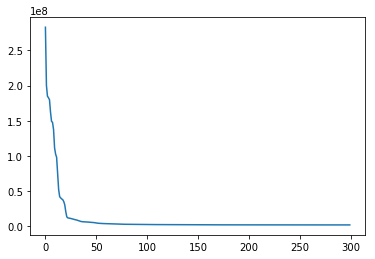

In [15]:
# testing no sparsity, no smoothnes, 1 iteration
%run palm_nmf.py
model = smoothNMF(r=3, max_iter=300, betaW=0, betaH=0)
model.fit(output['LL'], W=init_W, H=init_H)

print(LA.norm(output['LL'] - (model.W@model.H)))

plt.plot(model.cost)

In [6]:
model.W.shape

(15984, 3)

In [ ]:
W_reshaped = model.W.reshape(3, 144, 37, 3)

In [ ]:
plt.imshow(W_reshaped[0,:,:,2].T)

In [ ]:
# seems rank is 3 instead of 5 ???

In [8]:
output['params_all'][0]

array([ (array([[3]], dtype=uint8), array([[300]], dtype=uint16), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[ 0.01]]), array([[ 0.79356926,  0.68583276,  0.47923722],
       [ 0.25147678,  0.02458174,  0.74093368],
       [ 0.35542153,  0.65563691,  0.16546669],
       ..., 
       [ 0.30393594,  0.53490385,  0.479648  ],
       [ 0.22579433,  0.0252459 ,  0.88181876],
       [ 0.70095586,  0.70817463,  0.81695918]]), array([[ 0.67173166,  0.9991151 ,  0.04148563,  0.83565353,  0.12747172,
         0.03011316,  0.65920973,  0.52926348,  0.31257499,  0.20841812,
         0.47469398,  0.6112216 ,  0.07895626,  0.84482034,  0.6800992 ,
         0.70241879,  0.22143426,  0.993841  ,  0.98164242,  0.41348014,
         0.04923387,  0.50095291,  0.33073989,  0.14085829,  0.53415768,
         0.37381895,  0.23466282,  0.85890473,  0.78751958,  0.06436809,
         0.72707547,  0.92573622,  0.22753771,  0.11108188,  0.13246447,
         0.89778745,  0.86979509,  0.41128412,  

In [10]:
print(LA.norm(output['W'] - model.W))
print(LA.norm(output['V'] - model.V))

23.4337058716


KeyError: 'V'

In [16]:
output['params_all']['max_iter'][0,0]

array([[300]], dtype=uint16)

In [17]:
# display projection on first component